In [1]:
# Loading the dataset into dataframe
import pandas as pd
original_df = pd.read_csv("Amazon_Reviews.csv", low_memory=False)
original_df.head(5)
#original_df.info()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


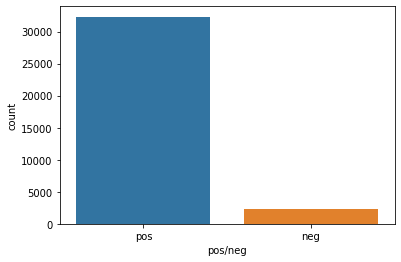

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer as ss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')


df = original_df[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
null = df[df["reviews.rating"].isnull()]

df = df[df["reviews.rating"].notnull()]

#Classifiying text as positive and negative
df["pos/neg"] = df["reviews.rating"]>=4
df["pos/neg"] = df["pos/neg"].replace([True , False] , ["pos" , "neg"])


sns.countplot(df['pos/neg'], data = df)
plt.show()

# PIE CHART

In [3]:
# data = data.dropna()
title_type = original_df.groupby('reviews.rating').agg('count')
# print(title_type)

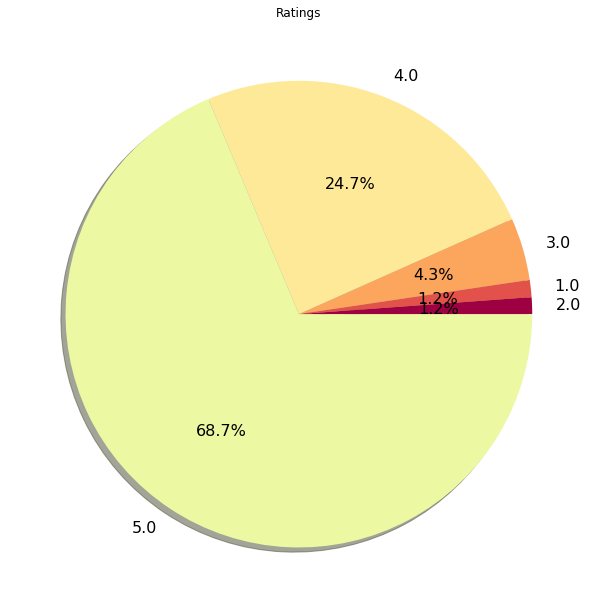

In [4]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# sort the indices and counts for our aggregated types:
type_labels = title_type.id.sort_values().index 
type_counts = title_type.id.sort_values()

# specify the figure details:
plt.figure(1, figsize = (23,25)) 
the_grid = GridSpec(2, 2)

# And specify the color map information:
# cmap = plt.get_cmap('Spectral')

#Finally, let’s plot our pie chart:
plt.figure(1, figsize = (40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral') #inferno, red, viridis, Spectral, summer, hsv , YlGn, BuPu
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect = 1, title = 'Ratings')
type_show_ids = plt.pie(type_counts, labels = type_labels, autopct = '%1.1f%%', shadow = True, colors = colors, textprops = {'fontsize': 16})
plt.show()

# CHECKING NULL VALUES- AND THEN SKIPPED HIGH NULL COLUMNS FOR ANALYSIS

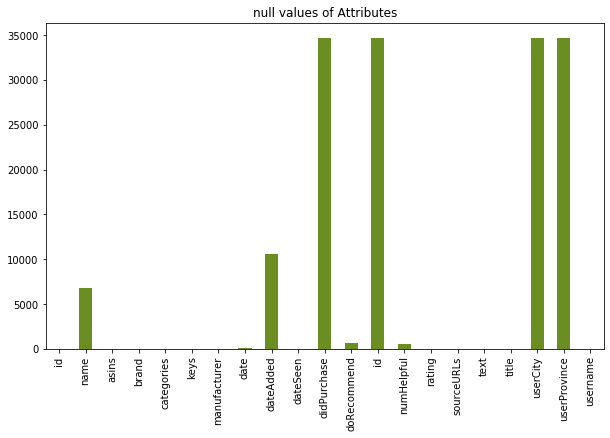

In [5]:
reviews = original_df.copy()

reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

reviews.nunique()

reviews.isnull().sum()
# drop usernames, userProvince,id,didPurchase
rev_null = reviews.isnull().sum()
rev_null.plot(kind = 'bar', figsize = (10,6), title = 'null values of Attributes', color = 'olivedrab')
plt.show()

# Find the NPS net promoter score of amazon
What's NPS score ?
How do we calculated for amazon ?

Net Promoters Score helps us evaluate customer satisfaction and loyalty


Rating 1,2,3 - Detractors

Rating 4 - Passive

Rating 5 - Promoters

NPS = (Promoters - Detractors)/Total ratings * 100

In [6]:
#What's NPS score ?
#How do we calculated for amazon ?
#Net Promoters Score helps us evaluate customer satisfaction and loyalty
#Rating 1,2,3 - Detractors
#Rating 4 - Passive
#Rating 5 - Promoters

#NPS = (Promoters - Critics)/Total ratings * 100

star = reviews.rating.value_counts()
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score)) 

 NPS score of Amazon is : 68.66


# Picked up one product and deep dive
We will pick one variation of kindle product drill & analyse its characteristics
Lets deep dive and pick product to analyse

 NPS score of Kindle is : 77.08


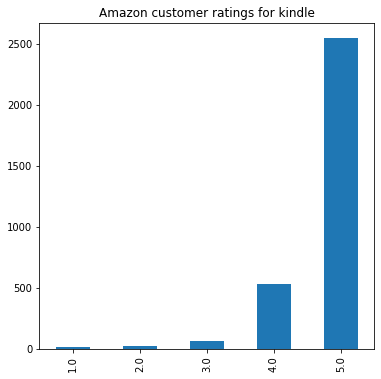

In [7]:

kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']
kindle.isnull().sum()

#what is NPS score  for [Paper white kindle] - ?

kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))

#Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,

#better NPS than overall amazon
kindle_s.plot(kind = 'bar', title = 'Amazon customer ratings for kindle', figsize = (6,6), style = 'Solarize_Light2')
plt.show()

# What about recommendations ? How is rating related to recommendation ?

In [8]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

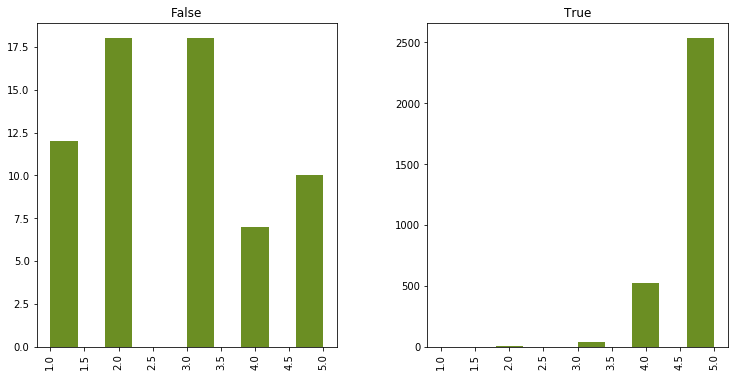

In [9]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6),color='olivedrab') ###REPLACE SCATTER PLOT yaxis=rating xaxis=kindle.doRecommend
plt.show()

# How are the sentiments on the text and title columns?

In [10]:
# Sentiment analysis data
Sentiment_data = original_df[["asins","brand","categories","reviews.text","reviews.title","reviews.rating","reviews.numHelpful","reviews.doRecommend"]]

In [11]:
# replacing the Null values for numHelpful column with 0
Sentiment_data['reviews.numHelpful'] = Sentiment_data['reviews.numHelpful'].fillna(0)
# assigning all values >=1 as 1 "helpful"
Sentiment_data['reviews.numHelpful']=Sentiment_data['reviews.numHelpful'].apply(lambda x: 1 if x>=1 else 0)
# Set NULL values as 0 (FALSE)
Sentiment_data['reviews.doRecommend']=Sentiment_data['reviews.doRecommend'].fillna(0)
# Converting the TRUE and FALSE values to 1 and 0
Sentiment_data['reviews.doRecommend']=Sentiment_data['reviews.doRecommend'].astype(dtype=np.int64) 

In [12]:
# Removing the null values
Sentiment_data = Sentiment_data.dropna()
Sentiment_data.info()# post NULL removal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34619 entries, 0 to 34659
Data columns (total 8 columns):
asins                  34619 non-null object
brand                  34619 non-null object
categories             34619 non-null object
reviews.text           34619 non-null object
reviews.title          34619 non-null object
reviews.rating         34619 non-null float64
reviews.numHelpful     34619 non-null int64
reviews.doRecommend    34619 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


In [13]:
# data post cleanup
Sentiment_data.head(5)

,asins,brand,categories,reviews.text,reviews.title,reviews.rating,reviews.numHelpful,reviews.doRecommend
0,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",This product so far has not disappointed. My c...,Kindle,5.0,0,1
1,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",great for beginner or experienced person. Boug...,very fast,5.0,0,1
2,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,0,1
3,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,0,1
4,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,0,1


In [14]:
# Vader Sentiment analysis for review text column
# pip install emoji
import emoji 
compound_val = []
sentiment_text = []
sentiment_class = []
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for review in Sentiment_data['reviews.text']:
    v1 = analyzer.polarity_scores(review)
    score=v1['compound']
    compound_val.append(score)
    if score >= 0.05:
        sentiment_text.append(emoji.emojize('Positive :thumbs_up:\N{grinning face}'))
        sentiment_class.append(1)
    elif (score > -0.05) and (score < 0.05):
        sentiment_text.append(emoji.emojize('Neutral :zipper-mouth_face:'))
        sentiment_class.append(0)
    elif score <= -0.05:
        sentiment_text.append(emoji.emojize('Negative :thumbs_down:\N{disappointed face}'))
        sentiment_class.append(-1)
Sentiment_data['Sentiment_Score_text'] = sentiment_text
Sentiment_data['text_score'] = compound_val
Sentiment_data['Sentiment_class'] = sentiment_class
Sentiment_data[['reviews.text','Sentiment_Score_text','text_score','Sentiment_class']]

KeyboardInterrupt: 

In [14]:
# Vader Sentiment analysis for review title column
import emoji 
compound_val1 = []
sentiment_text1 = []
sentiment_class1 = []
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for review in Sentiment_data['reviews.title']:
    v1 = analyzer.polarity_scores(review)
    score=v1['compound']
    compound_val1.append(score)
    if score >= 0.05:
        sentiment_text1.append(emoji.emojize('Positive :thumbs_up:\N{grinning face}'))
        sentiment_class1.append(1)
    elif (score > -0.05) and (score < 0.05):
        sentiment_text1.append(emoji.emojize('Neutral :zipper-mouth_face:'))
        sentiment_class1.append(0)
    elif score <= -0.05:
        sentiment_text1.append(emoji.emojize('Negative :thumbs_down:\N{disappointed face}'))
        sentiment_class1.append(-1)
Sentiment_data['Sentiment_Score_title'] = sentiment_text1
Sentiment_data['title_score'] = compound_val1
Sentiment_data['Sentiment_class_title'] = sentiment_class1
Sentiment_data[['reviews.title','Sentiment_Score_title','title_score','Sentiment_class_title']]

,reviews.title,Sentiment_Score_title,title_score,Sentiment_class_title
0,Kindle,Neutral 🤐,0.0000,0
1,very fast,Neutral 🤐,0.0000,0
2,Beginner tablet for our 9 year old son.,Neutral 🤐,0.0000,0
3,Good!!!,Positive 👍😀,0.5826,1
4,Fantastic Tablet for kids,Positive 👍😀,0.5574,1
...,...,...,...,...
34655,Not appreciably faster than any other 1.8A cha...,Neutral 🤐,0.0000,0
34656,Should be included,Neutral 🤐,0.0000,0
34657,Disappointing Charger,Negative 👎😞,-0.4939,-1
34658,Not worth the money,Negative 👎😞,-0.1695,-1


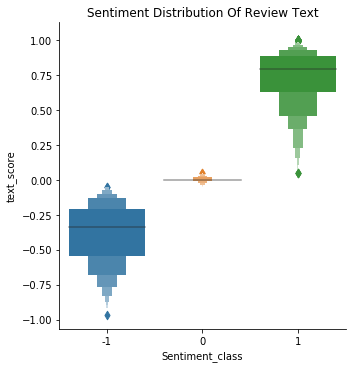

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='Sentiment_class',y='text_score',kind='boxen',data=Sentiment_data)
plt.title('Sentiment Distribution Of Review Text')
plt.show()

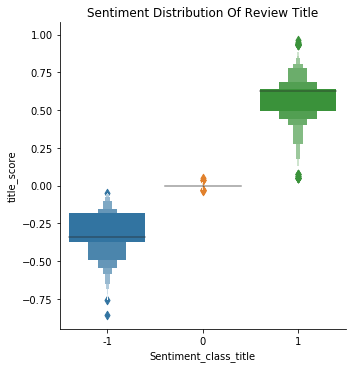

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='Sentiment_class_title',y='title_score',kind='boxen',data=Sentiment_data)
plt.title('Sentiment Distribution Of Review Title')
plt.show()

# What are the top Positive and Negative words in the review columns?

In [35]:
# Data cleanup for word cloud plots
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# function to stem the words
def stem(words): 
    stemmer = PorterStemmer()
    stem_words = []
    for x in words:
        stem_words.append(stemmer.stem(x))
    return stem_words

# function to generate cleaned text
def pre_process(text):
    # lowercase
    text = text.lower()
    # word tokenize
    words = nltk.word_tokenize(text)
    # remove punctuation and digits
    words = [word for word in words if word.isalpha()]
    # remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # stemming
    words = stem(words)
    return words
Sentiment_data["cleaned.text"] = Sentiment_data['reviews.text'].apply(pre_process)
Sentiment_data["cleaned.title"] = Sentiment_data['reviews.title'].apply(pre_process)
# Cleaned data
Sentiment_data[['reviews.text','cleaned.text','reviews.title','cleaned.title']].head(5)

,reviews.text,cleaned.text,reviews.title,cleaned.title
0,This product so far has not disappointed. My c...,"[product, far, disappoint, children, love, use...",Kindle,[kindl]
1,great for beginner or experienced person. Boug...,"[great, beginn, experienc, person, bought, gif...",very fast,[fast]
2,Inexpensive tablet for him to use and learn on...,"[inexpens, tablet, use, learn, step, nabi, thr...",Beginner tablet for our 9 year old son.,"[beginn, tablet, year, old, son]"
3,I've had my Fire HD 8 two weeks now and I love...,"[fire, hd, two, week, love, tablet, great, pri...",Good!!!,[good]
4,I bought this for my grand daughter when she c...,"[bought, grand, daughter, come, visit, set, us...",Fantastic Tablet for kids,"[fantast, tablet, kid]"


In [36]:
# Get the list of positive and negative words from a predefined positive and negative list
import os
pos_list = []
os.chdir('C:/Users/apurv/Desktop/MS Study Materials/Text_Mining_BAN675/Project/')
pos_list = open('C:/Users/apurv/Desktop/MS Study Materials/Text_Mining_BAN675/Project/positive_words.txt','r')
pos_list = [x.lower().strip('\n') for x in pos_list]
#print(pos_list[:5])

neg_list = []
neg_list = open('C:/Users/apurv/Desktop/MS Study Materials/Text_Mining_BAN675/Project/negative_words.txt','r')
neg_list = [x.lower().strip('\n') for x in neg_list]
#print(neg_list[:5])

# Get the list of positive and negative words in the cleaned text based on predefined list
positive_words = []
for j in Sentiment_data['cleaned.text'][Sentiment_data.Sentiment_Score_text == "Positive 👍😀"]:
    for i in j:
        positive_words.append(i)
positive_words = list([x for x in positive_words if x in pos_list])
print(positive_words[:10])
    
negative_words = []
for j in Sentiment_data['cleaned.text'][Sentiment_data.Sentiment_Score_text == "Negative 👎😞"]:
    for i in j:
        negative_words.append(i)
negative_words = list([x for x in negative_words if x in neg_list])
print(negative_words[:10]) 
        
# Get the list of positive and negative words in the cleaned title based on predefined list
positive_words_title = []
for j in Sentiment_data['cleaned.title'][Sentiment_data.Sentiment_Score_title == "Positive 👍😀"]:
    for i in j:
        positive_words_title.append(i)
positive_words_title = list([x for x in positive_words_title if x in pos_list])
print(positive_words_title[:10])
    
negative_words_title = []
for j in Sentiment_data['cleaned.title'][Sentiment_data.Sentiment_Score_title == "Negative 👎😞"]:
    for i in j:
        negative_words_title.append(i)
negative_words_title = list([x for x in negative_words_title if x in neg_list])
print(negative_words_title[:10]) 

['love', 'like', 'great', 'love', 'thrill', 'love', 'great', 'shine', 'love', 'well']
['sever', 'annoy', 'worst', 'steal', 'problem', 'killer', 'lost', 'cheap', 'bad', 'dim']
['good', 'great', 'great', 'great', 'great', 'nice', 'excel', 'great', 'good', 'nice']
['disappoint', 'useless', 'broke', 'killer', 'poor', 'lose', 'hate', 'bad', 'disappoint', 'poor']


In [37]:
# Top 50 positive and negative words
freq_pos = nltk.FreqDist(positive_words)
freq_positive = freq_pos.most_common(20)

freq_neg = nltk.FreqDist(negative_words)
freq_negative = freq_neg.most_common(20)

# Convert to string for WordCloud
for i in range(len(freq_positive)):
    positive =' '.join([x for x,y in freq_positive])

for i in range(len(freq_negative)):
    negative =' '.join([x for x,y in freq_negative])

# Top 50 positive and negative words for review titles
freq_pos1 = nltk.FreqDist(positive_words_title)
freq_pos_title = freq_pos1.most_common(20)

freq_neg1 = nltk.FreqDist(negative_words_title)
freq_neg_title = freq_neg1.most_common(20)

# Convert to string for WordCloud
for i in range(len(freq_pos1)):
    positive_title =' '.join([x for x,y in freq_pos_title])

for i in range(len(freq_neg1)):
    negative_title =' '.join([x for x,y in freq_neg_title])

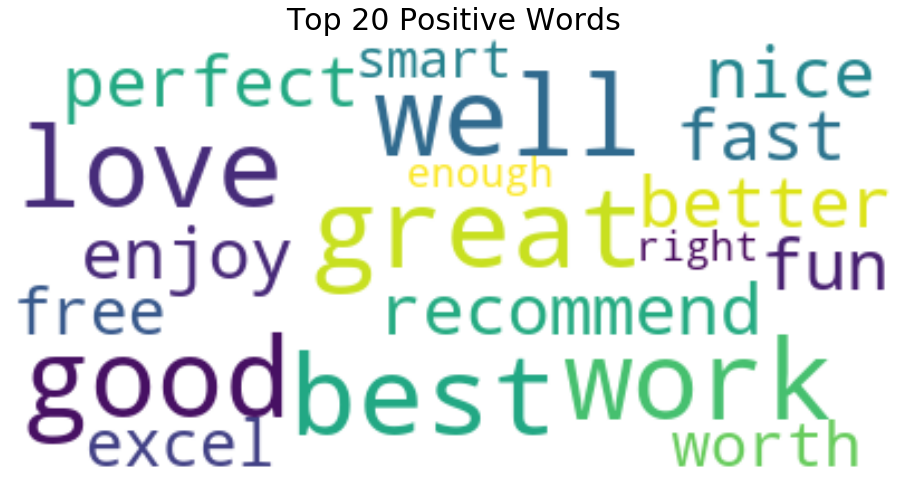

In [39]:
# Top 20 positive words in reviews.text column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(positive)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 20 Positive Words', fontsize = 30)                                                                                            
plt.axis("off")
plt.show()

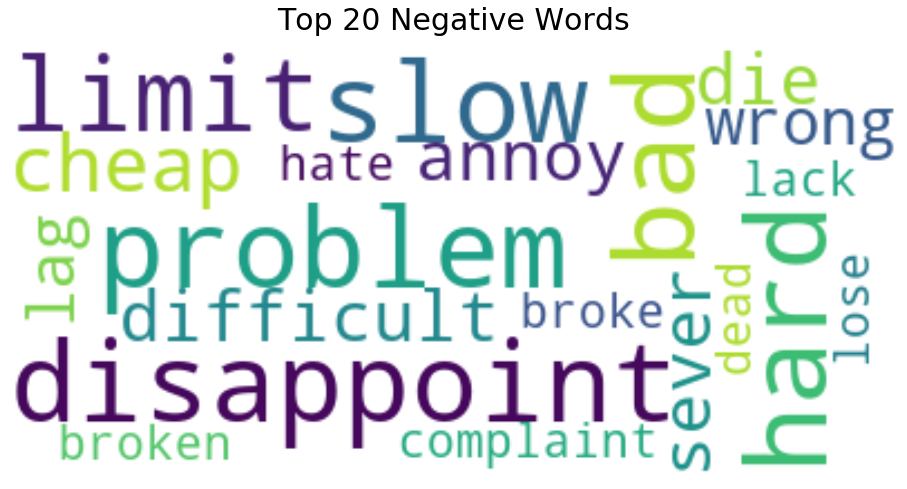

In [40]:
# Top 20 negative words in reviews.text column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(negative)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 20 Negative Words', fontsize = 30) 
plt.axis("off")
plt.show()

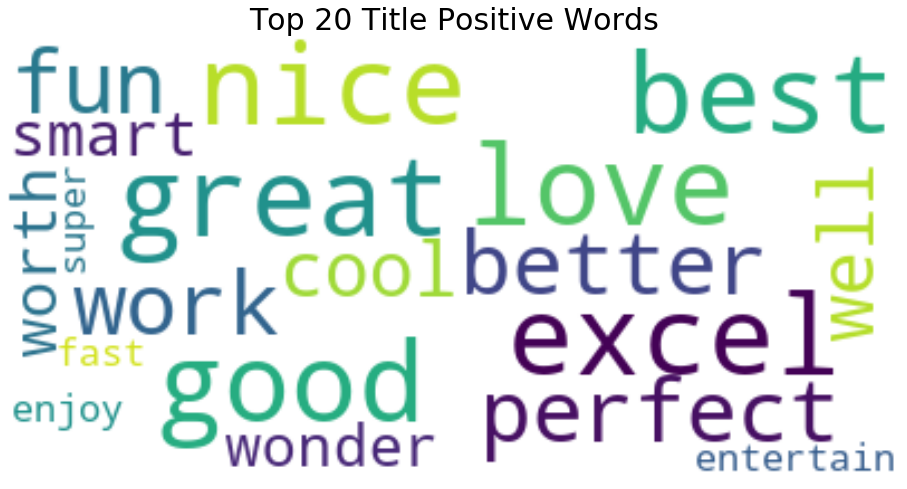

In [41]:
# Top 20 positive words in reviews.title column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(positive_title)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 20 Title Positive Words',fontsize = 30)                                                                                        
plt.axis("off")
plt.show()

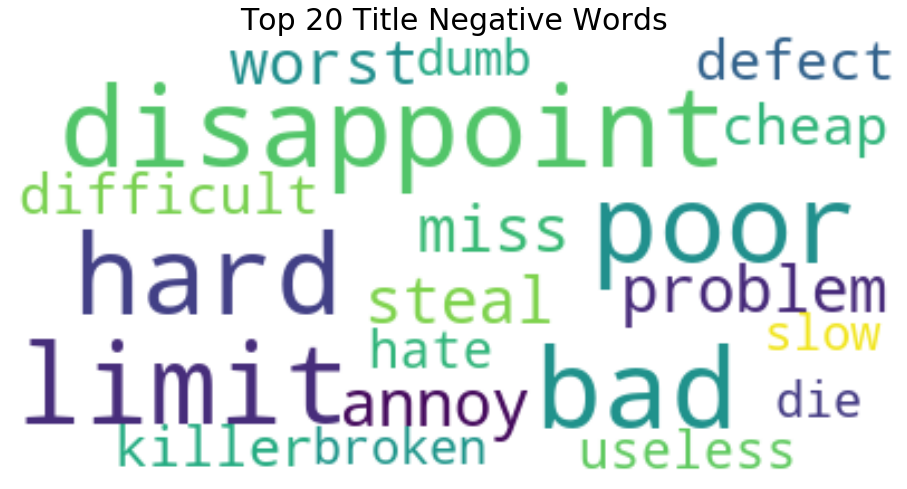

In [42]:
# Top 20 negative words in reviews.title column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(negative_title)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 20 Title Negative Words',fontsize = 30) 
plt.axis("off")
plt.show()

# Comparing Accuracy of Models

Data Pre-Processing

In [15]:
# variables that are going to be used to check accuracy
mod_data = Sentiment_data[["reviews.rating","reviews.numHelpful","reviews.doRecommend","reviews.text","reviews.title"]]
# mod_data.head(5)

In [16]:
# assigning all >=4 as 1 else 0
mod_data['reviews.rating'] = mod_data['reviews.rating'].apply(lambda x1: 1 if x1 >= 4 else 0)

In [17]:
sentiment= mod_data[["reviews.rating","reviews.numHelpful","reviews.doRecommend","reviews.text","reviews.title"]]

sentiment["sentiment.ratings"] = sentiment["reviews.rating"]>=1
sentiment["sentiment.ratings"] = sentiment["sentiment.ratings"].replace([True,False],["pos","neg"])

sentiment["sentiment.numHelpful"] = sentiment["reviews.numHelpful"]>=1
sentiment["sentiment.numHelpful"] = sentiment["sentiment.numHelpful"].replace([True,False],["pos","neg"])

sentiment["sentiment.doRecommend"] = sentiment["reviews.doRecommend"]>=1
sentiment["sentiment.doRecommend"] = sentiment["sentiment.doRecommend"].replace([True,False],["pos","neg"])

# sentiment.head()

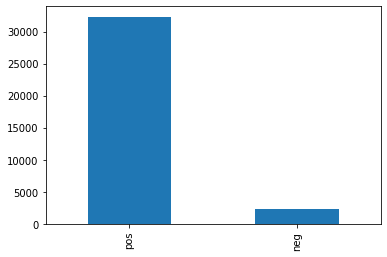

In [18]:
#counting each set of pos and neg & plotting the graph

sentiment["sentiment.ratings"].value_counts().plot.bar()
plt.show()

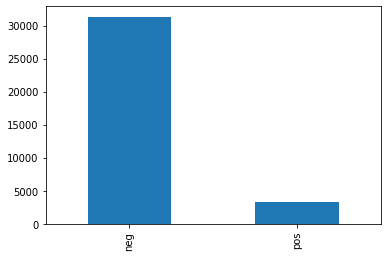

In [19]:
sentiment["sentiment.numHelpful"].value_counts().plot.bar()
plt.show()

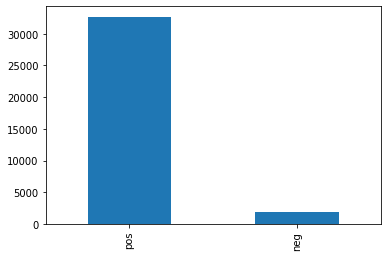

In [20]:
sentiment["sentiment.doRecommend"].value_counts().plot.bar()
plt.show()

# Cleaning Review Text and Review Title

In [21]:
# saving below pattern match
cleanup_re =re.compile('[^a-z]+')

#cleaning each sentence of reviews
def cleanup(sentence) :
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ',sentence).strip()
  return sentence

sentiment["clean_text"] = sentiment["reviews.text"].apply(cleanup)
mod_data["clean_text"] = mod_data["reviews.text"].apply(cleanup)

sentiment["clean_title"] = sentiment["reviews.title"].apply(cleanup)
mod_data["clean_title"] = mod_data["reviews.title"].apply(cleanup)

# sentiment.head()

# Building Count & TFI reviews Vector for Text Column

In [22]:
# import stopwords from word cloud
from wordcloud import STOPWORDS

# importing Term Frequency Extraction form sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# stopwords removing Not 
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))

tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(sentiment["clean_text"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(sentiment["clean_text"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(mod_data["clean_text"])
checktfidf = tfidf_transformer.transform(checkcounts)

# Fitting Multinomial Naive Bayes for text column

In [23]:
prediction={}
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB().fit(X_train_tfidf , sentiment["sentiment.numHelpful"])
prediction['Multinomial'] = model_MNB.predict_proba(X_test_tfidf)[:,1]
acc = model_MNB.score(X_test_tfidf , sentiment["sentiment.numHelpful"])
print("Multinomial Accuracy : "+str(acc*100),"%")

mod_data["MNB"] = model_MNB.predict(checktfidf)

Multinomial Accuracy : 90.45610791761749 %


# Fitting Bernoulli Naive Bayes for text column

In [24]:
from sklearn.naive_bayes import BernoulliNB
#fitting the bernouli Naive Bayes
model_BNB = BernoulliNB().fit(X_train_tfidf,sentiment["sentiment.numHelpful"])
prediction['Bernoulli'] = model_BNB.predict_proba(X_test_tfidf)[:,1]
acc= model_BNB.score(X_test_tfidf , sentiment["sentiment.numHelpful"])
print("Bernoulli Accuracy : "+str(acc*100),"%")

mod_data["BNB"] = model_BNB.predict(checktfidf)

Bernoulli Accuracy : 88.23478436696611 %


# Fitting Logistic Regression for text column

In [25]:
from sklearn import linear_model
logistic_reg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logistic_reg.fit(X_train_tfidf, sentiment["sentiment.numHelpful"])
prediction['LogisticRegression'] = logistic_reg.predict_proba(X_test_tfidf)[:,1]
acc=logistic_reg.score(X_test_tfidf , sentiment["sentiment.numHelpful"])
print("Logistic Regression Accuracy : "+str(acc*100),"%")

mod_data["log"] = logistic_reg.predict(checktfidf)

Logistic Regression Accuracy : 99.96533695369595 %


# ROC Curves for model comparison for Text Column

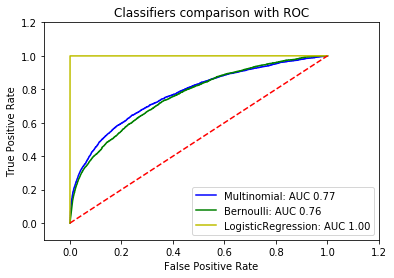

In [26]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(sentiment["sentiment.numHelpful"].map(vfunc), predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Building Count & TFI reviews Vector for Title Column

In [27]:
# import stopwords from word cloud
from wordcloud import STOPWORDS

# importing Term Frequency Extraction form sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# stopwords removing Not from it
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))

tfidf_transformer = TfidfTransformer()

X1_train_counts = count_vect.fit_transform(sentiment["clean_title"])        
X1_train_tfidf = tfidf_transformer.fit_transform(X1_train_counts)


X1_new_counts = count_vect.transform(sentiment["clean_title"])
X1_test_tfidf = tfidf_transformer.transform(X1_new_counts)

check_counts = count_vect.transform(mod_data["clean_title"])
checktfidf = tfidf_transformer.transform(check_counts)

# Fitting Multinomial Naive Bayes for title column

In [28]:
prediction_title={}
from sklearn.naive_bayes import MultinomialNB
model_MNB = MultinomialNB().fit(X1_train_tfidf , sentiment["sentiment.numHelpful"])
prediction_title['Multinomial'] = model_MNB.predict_proba(X1_test_tfidf)[:,1]
acc = model_MNB.score(X1_test_tfidf , sentiment["sentiment.numHelpful"])
print("Multinomial Accuracy : "+str(acc*100),"%")

mod_data["MNB"] = model_MNB.predict(checktfidf)

Multinomial Accuracy : 90.59764869002571 %


# Fitting Bernoulli Naive Bayes for title column

In [29]:
from sklearn.naive_bayes import BernoulliNB
#fitting the bernouli Naive Bayes
model_BNB = BernoulliNB().fit(X1_train_tfidf,sentiment["sentiment.numHelpful"])
prediction_title['Bernoulli'] = model_BNB.predict_proba(X1_test_tfidf)[:,1]
acc= model_BNB.score(X1_test_tfidf , sentiment["sentiment.numHelpful"])
print("Bernoulli Accuracy : "+str(acc*100),"%")

mod_data["BNB"] = model_BNB.predict(checktfidf)

Bernoulli Accuracy : 89.7397382940004 %


# Fitting Logistic Regression for title column

In [30]:
from sklearn import linear_model
logistic_reg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logistic_reg.fit(X1_train_tfidf, sentiment["sentiment.numHelpful"])
prediction_title['LogisticRegression'] = logistic_reg.predict_proba(X1_test_tfidf)[:,1]
acc=logistic_reg.score(X1_test_tfidf , sentiment["sentiment.numHelpful"])
print("Logistic Regression Accuracy : "+str(acc*100),"%")

mod_data["log"] = logistic_reg.predict(checktfidf)

Logistic Regression Accuracy : 91.81952107224357 %


# ROC Curves for model comparison for Title Column

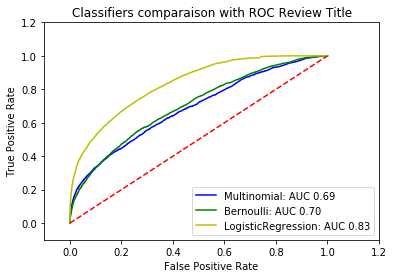

In [31]:
def formatt_1(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt_1)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction_title.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(sentiment["sentiment.numHelpful"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC Review Title')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LOGISTIC REGRESSION

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

logistic_reg_df = Sentiment_data[["reviews.text","reviews.title","reviews.rating","reviews.numHelpful","reviews.doRecommend","Sentiment_class","Sentiment_class_title"]]
logistic_reg_df.head(5)

,reviews.text,reviews.title,reviews.rating,reviews.numHelpful,reviews.doRecommend,Sentiment_class,Sentiment_class_title
0,This product so far has not disappointed. My c...,Kindle,5.0,0,1,1,0
1,great for beginner or experienced person. Boug...,very fast,5.0,0,1,1,0
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,0,1,1,0
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,0,1,1,1
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,0,1,1,1


In [21]:
logistic_reg_df['reviews.isHelpful'] = logistic_reg_df['reviews.numHelpful'].apply(lambda x1: 1 if x1 >= 1 else 0)
logistic_reg_df['reviews.text.length'] = logistic_reg_df['reviews.text'].apply(lambda x: len(str(x)))
logistic_reg_df['reviews.title.length'] = logistic_reg_df['reviews.title'].apply(lambda y: len(str(y)))
logistic_reg_df['reviews.isRatingHelpful'] = logistic_reg_df['reviews.rating'].apply(lambda z: 1 if z >= 3 else 0)

# Converting sentiment scores to just positive and negative
logistic_reg_df['reviews.text.sentiment.score'] = logistic_reg_df['Sentiment_class'].apply(lambda x: 1 if x==1 else 0)
logistic_reg_df['reviews.title.sentiment.score'] = logistic_reg_df['Sentiment_class_title'].apply(lambda x: 1 if x==1 else 0)

logistic_reg_df.head(5)

,reviews.text,reviews.title,reviews.rating,reviews.numHelpful,reviews.doRecommend,Sentiment_class,Sentiment_class_title,reviews.isHelpful,reviews.text.length,reviews.title.length,reviews.isRatingHelpful,reviews.text.sentiment.score,reviews.title.sentiment.score
0,This product so far has not disappointed. My c...,Kindle,5.0,0,1,1,0,0,143,6,1,1,0
1,great for beginner or experienced person. Boug...,very fast,5.0,0,1,1,0,0,75,9,1,1,0
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,0,1,1,0,0,131,39,1,1,0
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,0,1,1,1,0,593,7,1,1,1
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,0,1,1,1,0,613,25,1,1,1


In [22]:
clean_df = logistic_reg_df[["reviews.text.length","reviews.title.length","reviews.isRatingHelpful","reviews.doRecommend", "reviews.isHelpful","reviews.text.sentiment.score", "reviews.title.sentiment.score"]].copy()
clean_df.head()

,reviews.text.length,reviews.title.length,reviews.isRatingHelpful,reviews.doRecommend,reviews.isHelpful,reviews.text.sentiment.score,reviews.title.sentiment.score
0,143,6,1,1,0,1,0
1,75,9,1,1,0,1,0
2,131,39,1,1,0,1,0
3,593,7,1,1,0,1,1
4,613,25,1,1,0,1,1


In [23]:
import statsmodels.api as sm

y_var = clean_df['reviews.isHelpful']
x_vars = clean_df.drop('reviews.isHelpful', axis=1)
x_vars = sm.add_constant(x_vars)
xTrain, xValid, yTrain, yValid = train_test_split(x_vars, y_var, train_size=0.6, random_state=2);

In [24]:
logit_all = sm.Logit(yTrain, xTrain)
results_all = logit_all.fit()
print(results_all.summary())

Optimization terminated successfully.
         Current function value: 0.301834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      reviews.isHelpful   No. Observations:                20771
Model:                          Logit   Df Residuals:                    20764
Method:                           MLE   Df Model:                            6
Date:                Sun, 19 Jul 2020   Pseudo R-squ.:                 0.04085
Time:                        10:41:13   Log-Likelihood:                -6269.4
converged:                       True   LL-Null:                       -6536.4
Covariance Type:            nonrobust   LLR p-value:                4.006e-112
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6641      0.122    -13.651      0.

In [25]:
# look at the confidence interval of each coeffecient
print("Confidence Interval of each Coeffecient")
print(results_all.conf_int())

Confidence Interval of each Coeffecient
                                      0         1
const                         -1.903000 -1.425146
reviews.text.length            0.001665  0.002107
reviews.title.length           0.006157  0.014818
reviews.isRatingHelpful       -1.665230 -1.052097
reviews.doRecommend           -0.011471  0.506334
reviews.text.sentiment.score  -0.180680  0.141771
reviews.title.sentiment.score -0.186819  0.068592


In [26]:
# odds ratios
print("Odds Ratios")
np.exp(results_all.params)

Odds Ratios


const                            0.189366
reviews.text.length              1.001887
reviews.title.length             1.010543
reviews.isRatingHelpful          0.257004
reviews.doRecommend              1.280732
reviews.text.sentiment.score     0.980734
reviews.title.sentiment.score    0.942599
dtype: float64

In [27]:
# odds ratios and 95% CI
params = results_all.params
conf = results_all.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print("Odds Ratios and 95% CI")
print(np.exp(conf))

Odds Ratios and 95% CI
                                   2.5%     97.5%        OR
const                          0.149121  0.240473  0.189366
reviews.text.length            1.001666  1.002109  1.001887
reviews.title.length           1.006176  1.014928  1.010543
reviews.isRatingHelpful        0.189147  0.349205  0.257004
reviews.doRecommend            0.988595  1.659197  1.280732
reviews.text.sentiment.score   0.834703  1.152312  0.980734
reviews.title.sentiment.score  0.829593  1.070999  0.942599
